In [30]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, Bounds, OptimizeResult
from scipy.optimize import Bounds
from scipy.optimize import differential_evolution
from ECIR_new import ECIRModel

In [31]:
class Calibration:
    def __init__(self, data, dt, model_class, initial_params):
        self.data = data
        self.dt = dt
        self.model_class = model_class
        self.initial_params = initial_params

    def _nlog_likelihood(self, params):
        model = self.model_class(*params)
        loglikelihood = 0
        for i in range(1, len(self.data)):
            transition_density = model.transition_density(self.data.iloc[i], self.data.iloc[i-1], self.dt)
            print(f"Transition Density for params {params}: {transition_density}")  # Debug print
            if transition_density <= 0:
                print(f"Non-positive transition density for params {params}")  # Debug print
                return np.inf
            loglikelihood += np.log(transition_density)
        return -loglikelihood

    def calibrate(self, bounds):
        result = differential_evolution(self._nlog_likelihood, bounds, disp=True)
        return result


<Axes: xlabel='DATE'>

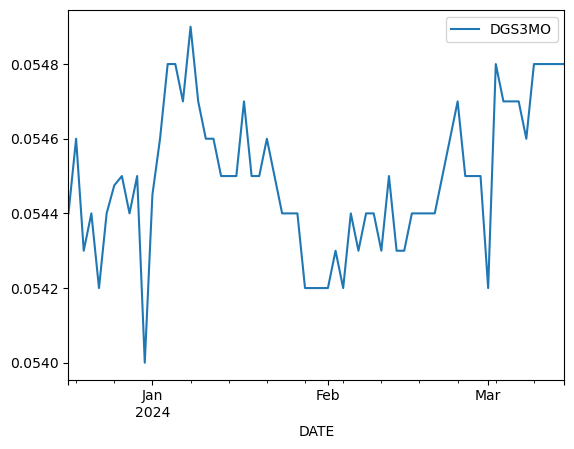

In [32]:
# calibrate using 3mon treasury bill YTM for the past 6 months
df_1_yc = pd.read_csv("DGS3MO.csv")

# data cleaning
df_1_yc.index = pd.to_datetime(df_1_yc.DATE)
df_1_yc = df_1_yc.dropna().drop(columns=["DATE"])
df_1_yc.DGS3MO = df_1_yc.DGS3MO.replace(".", np.nan).astype(float)/100
df_1_yc = df_1_yc.dropna()

# filter out calibration period
df_1_yc = df_1_yc['2023-12-15':'2024-03-15']

df_1_yc.plot()

In [33]:
initial_model_params = {
    "kappa": 0.5,
    "mu_r": 0.03,
    "sigma": 0.03,
    "mu": 0.5,
    "gamma": 0.01
}

# Then you can run the calibration
calibrator = Calibration(
    data=df_1_yc['DGS3MO'],
    dt=1/252,
    model_class=ECIRModel,
    initial_params=initial_model_params
)

bounds = [
    (0.001, 5),  # kappa
    (0.001, 0.1),  # mu_r
    (0.001, 0.5),  # sigma
    (0, 1),  # mu
    (0.001, 0.1),  # gamma
    ]

result = calibrator.calibrate(bounds=bounds)

Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.20141892628205
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.44218130404356
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.36739333656675
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.52321501540406
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.32217345197164
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.33088911377641
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.33023752266475
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.40803122873656
Transition Density for params [4.22336433 0.02605043 0.41962182 0.46676788 0.07165235]: 64.3070888982577
Transition Density for params [4.22336433 0.026

Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 203.51547744960027
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 199.92946745333586
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 201.8859487710629
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 203.51547744960027
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 197.27893550934235
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 204.42294342458078
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 202.07838213930967
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 199.92946745333586
Transition Density for params [1.70011716 0.00202447 0.13221132 0.14622127 0.07305882]: 201.8859487710629
Transition Density for params [1.700117

Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.083178650104
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.083178650104
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 427.70571813519587
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 599.6593880300069
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.92552740333
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.92552740333
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.92552740333
Transition Density for params [4.1806691  0.08250931 0.04098971 0.67922708 0.07094424]: 492.92552740333
Transition Density for params [3.64625642 0.06885352 0.42586112 0.49022583 0.06919194]: 63.635225193478085
Transition Density for params [3.64625642 0.06885352 0

Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.35583369830408
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 146.04385038995048
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 146.04385038995048
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.1065679937177
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 143.07092342626908
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.53269630643314
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.77691237708407
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.77691237708407
Transition Density for params [2.13234963 0.05565092 0.18551349 0.31945339 0.01597826]: 145.66368342170443
Transition Density for params [2.13234

Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.49764835485114
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.51888703389535
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.51888703389535
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.65298568142978
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 72.78524391299905
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.38441388510276
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.38204785841114
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.38204785841114
Transition Density for params [4.29343471 0.03526109 0.36786753 0.30436889 0.00561821]: 73.45232705620649
Transition Density for params [4.29343471 0.03

Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.54169337500436
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.83868467003778
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.694763579973106
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.63561617558631
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.557221371832355
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.70482111958506
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.238815778334576
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.98016834023275
Transition Density for params [2.92227649 0.09548629 0.49495406 0.37049028 0.07992438]: 54.69811643981719
Transition Density for params [2.92227649 0

Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.15179361162438
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.4833819239454
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.4833819239454
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.4833819239454
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.03370859308646
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 124.91594547801341
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 124.79850279657968
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.65779191558538
Transition Density for params [2.42281589 0.02242228 0.2147634  0.69801784 0.01763292]: 125.36557780761031
Transition Density for params [2.4228158

Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1235.0039046640752
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1236.0047271011388
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1306.3687349181016
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1306.3687349181016
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1051.6854087766826
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1308.7766652080136
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1308.7766652080136
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1308.7766652080136
Transition Density for params [0.01589052 0.06445207 0.02073485 0.60538231 0.02874225]: 1240.7553314651966
Transition Density for params [0.0158

Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 143.27353830399258
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.39618425263174
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.39618425263174
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.39618425263174
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.54737565777737
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 143.92624419288012
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.5081789790049
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 143.79762396344154
Transition Density for params [1.64550008 0.0740198  0.18784064 0.45616731 0.06437058]: 144.41458960308913
Transition Density for params [1.64550

Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 0.6535143574266208
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 0.0002101349903336367
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 3273.6004108753646
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 7.190687764406388e-09
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 0.00017106866213127095
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 0.48946973196463467
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-01
 3.10031494e-02]: 0.00013903679152167672
Transition Density for params [4.72586467e+00 6.92151693e-02 4.27976002e-03 8.05710610e-0

Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 804.37232680527
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 816.6644079748448
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 816.6644079748448
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 749.7198832871173
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 301.1722031643897
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 826.5940130845892
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 815.0358855341132
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 815.0358855341132
Transition Density for params [0.76352139 0.02673551 0.03268712 0.1983134  0.055406  ]: 827.3321663097805
Transition Density for params [0.76352139 0.0267

Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 88.45527082700777
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 6594.150900077208
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 6594.150900077208
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 0.006600425034792265
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 6501.411521594157
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 6501.411521594157
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 6501.411521594157
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 3121.7869729738363
Transition Density for params [1.0313032  0.06292931 0.0030079  0.53570417 0.05254641]: 82.32458923130672
Transition Density for params [1.0313032  

Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.8588500627172
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 148.12670835648862
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 148.12670835648862
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.82007614797436
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 143.67620346844535
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.82322508466618
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.8536826167024
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.8536826167024
Transition Density for params [1.44428853 0.03703098 0.18272907 0.38856121 0.07856413]: 147.95830327126458
Transition Density for params [1.4442885

Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.57609840411908
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.36227412565306
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.65607507047515
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.53920384025895
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.69882831554688
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.5965343130894
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.55071665334249
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.51529067680299
Transition Density for params [0.38855485 0.08657376 0.40721658 0.30746956 0.06662551]: 66.5947720060917
Transition Density for params [0.38855485 0.0865

Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 0.5825519150772364
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 4.472129825056672e-10
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 0.001834344218233724
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 0.001834344218233724
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 2.8450591018879395e-12
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 1331.0412119583784
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 2.21630596317473e-06
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 0.0022040555445537705
Transition Density for params [2.61082138 0.09910911 0.00578567 0.36395331 0.05494219]: 0.0022040555445537705
Transition Density

Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 135.68091453475338
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 135.60883258942604
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 135.43655718758973
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 134.90913154913716
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 134.53741287858293
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 135.31258686940973
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 133.89793366462237
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 134.65520814545565
Transition Density for params [2.20168477 0.07656736 0.2000745  0.05030597 0.02885766]: 135.1497602087344
Transition Density for params [2.20168

Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 214.2495763363504
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 221.1705085613674
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 219.8673290123931
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 219.075052651522
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 216.68739727365684
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 220.1319260052583
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 202.73725920609422
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 220.26346037093927
Transition Density for params [2.4710053  0.0793185  0.1228904  0.12949136 0.06773995]: 220.4373166277325
Transition Density for params [2.4710053  0.

Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.14384145949768
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.01660997260315
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.02933378410764
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.14467821661917
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.25990327763766
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.25990327763766
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.13402882105416
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.49298735968215
Transition Density for params [0.80225967 0.03858652 0.2147634  0.30746575 0.06294247]: 126.49298735968215
Transition Density for params [0.8022

Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.10707469711113
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.28572670182193
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 97.66230870700426
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.0160668781918
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.0160668781918
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.0160668781918
Transition Density for params [2.55667886 0.02049071 0.2742719  0.65748584 0.04391509]: 98.0160668781918
Transition Density for params [3.44325101 0.0843906  0.15443297 0.71159739 0.04142301]: 174.57752704740923
Transition Density for params [3.44325101 0.0843906  0.15443297 0.71159739 0.04142301]: 166.73998185108184
Transition Density for params [3.44325101 0.0843

Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 464.9767929757758
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 468.1548369025888
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 478.3036051167632
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 481.2314463208871
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 478.72827059218
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 481.67403106474205
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 481.67403106474205
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 465.81306596867734
Transition Density for params [0.35569026 0.04442925 0.05616481 0.65581666 0.06437058]: 468.93127684060323
Transition Density for params [0.35569026 0.

Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 3658.280979642988
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 585.0192639392319
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 4346.852098988632
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 3.5297996812732343e-06
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 1.0393349500500824
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 3300.2199358220387
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 1804.773380407799
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 3040.52880433638
Transition Density for params [2.20168477 0.06371734 0.00609815 0.62891065 0.04457866]: 625.2053501343463
Transition Density for params [2.2016847

Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 124.70341453720668
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 123.88355321684534
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 126.08145896550938
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 122.85294594563527
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 124.80296989035403
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 125.5044554577188
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 124.70341453720668
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 124.70341453720668
Transition Density for params [3.64625642 0.09580541 0.21350686 0.34840227 0.02450126]: 124.70341453720668
Transition Density for params [3.64625

Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 201.73673369057752
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 201.4452127675083
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 202.0950550371805
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 201.93679967128676
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 201.4452127675083
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 201.54695596889
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 200.2633835564143
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 202.1210933479263
Transition Density for params [1.58645864 0.06145115 0.13393914 0.91531052 0.05704426]: 202.0950550371805
Transition Density for params [1.58645864 0.06

Transition Density for params [1.86553585 0.01789515 0.02864867 0.12256582 0.07887396]: 765.761956341816
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.01756639212044
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 77.81479334972573
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.13746076510185
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.02873904966171
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.16175986820421
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.07276150018323
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 78.02787738801918
Transition Density for params [1.24862176 0.05252549 0.34667593 0.77068638 0.04701849]: 77.99956948347747
Transition Density for params [1.24862176 0.052

Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 167.1120820954488
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.12842658968998
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.72224156827815
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.27144581461175
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.87174299832867
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.87174299832867
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.87202925864264
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 167.38351176881355
Transition Density for params [4.12028041 0.06061896 0.16000891 0.76500795 0.03581416]: 168.87174299832867
Transition Density for params [4.12028

Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.57108904396617
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.82925110877898
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.73146689204117
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.66907142690957
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.59337836733496
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.72195509662207
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 99.75586078292196
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.53616756208613
Transition Density for params [0.35569026 0.07445093 0.26943614 0.09451805 0.06147276]: 100.64463388577198
Transition Density for params [0.35569

Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.62860778100722
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 108.09876828379937
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.98742834528967
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 108.04273764983283
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 108.02561901513518
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.9890504647731
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.97210291594303
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.99917136716272
Transition Density for params [0.76219673 0.03949118 0.25042318 0.79974159 0.06698793]: 107.16437883764236
Transition Density for params [0.76219

Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 419.10859372541677
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 426.61074314434376
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 427.48375246640205
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 424.9014692230262
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 425.5655424244868
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 369.3486916715366
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 382.17974788845385
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 422.3738095784735
Transition Density for params [0.04281187 0.07107625 0.06322334 0.92321484 0.0713037 ]: 417.6332603477972
Transition Density for params [0.04281187 

Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 799.5193007095238
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 766.7195749537245
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 768.0473084586794
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 766.7426050898745
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 798.5612139087068
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 798.0561115233054
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 766.7426050898745
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 766.738072780914
Transition Density for params [3.59957556 0.0578018  0.03377845 0.61286218 0.01685967]: 707.8771274675621
Transition Density for params [3.59957556 0.057

Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 1687.0465554351022
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 1220.0579749815404
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 790.2495749108137
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 1216.0532562845765
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 1216.0532562845765
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 1216.0532562845765
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 787.0567809590284
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 783.8766843658849
Transition Density for params [2.17458461 0.03228704 0.01601287 0.89639755 0.01699171]: 780.7092389842827
Transition Density for params [2.17458461

Transition Density for params [0.90564055 0.04563895 0.03786046 0.5534495  0.02541602]: 711.7462999690999
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 830.0706146468995
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 725.9649912029555
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 901.7752446965875
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 831.4370248169118
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 831.6312807216322
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 911.7526048414275
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 923.7523562595073
Transition Density for params [0.50783877 0.05402429 0.02920547 0.98728787 0.06847474]: 900.947738287414
Transition Density for params [0.50783877 0.054

Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 739.7245053636767
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 766.4280030344137
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 764.6126401321656
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 767.0948278137088
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 765.3477302353027
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 765.3477302353027
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 679.5961756891072
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 740.7764320318738
Transition Density for params [0.64457693 0.03166801 0.03510991 0.78075713 0.05464131]: 765.3477302353027
Transition Density for params [0.64457693 0.03

Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 964.907365255863
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 963.3756623196451
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 961.8438420802277
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 900.0088986991345
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 1003.2267253104318
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 1003.2267253104318
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 773.7932373628752
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 305.7818818886167
Transition Density for params [2.60708727 0.0531674  0.02697491 0.45878857 0.07977648]: 979.4683689802849
Transition Density for params [2.60708727 0.0

Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.20509312769023
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.65171194489815
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.85687598030347
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.76720499881188
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.97393267592156
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.97393267592156
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.7589784708676
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.43197548561514
Transition Density for params [1.92560127 0.05695067 0.21144499 0.62974414 0.05252286]: 127.97393267592156
Transition Density for params [1.92560

Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1202.2176912534305
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1025.6112276507445
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1414.151136002078
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 703.4333833974514
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1102.0243712232823
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1242.9931914334816
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1452.4441171308983
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 1023.9835707229197
Transition Density for params [1.07350989 0.02400731 0.01849615 0.93298824 0.06715943]: 579.0425778081184
Transition Density for params [1.0735098

Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 2370.4661106496574
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 1814.0011122166684
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 1811.5991746277923
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 1809.20342788102
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 1372.766832990356
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 2367.914703540585
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 2367.914703540585
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 605.4718314950672
Transition Density for params [0.51558982 0.04269977 0.01131443 0.48841957 0.05637765]: 2.060199811701942
Transition Density for params [0.51558982 0.

Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 998.7369275955467
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 998.7369275955467
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 1024.3129354547045
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 779.7955038868847
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 997.5980416891507
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 997.5980416891507
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 997.5980416891507
Transition Density for params [1.18603469 0.0359442  0.02640695 0.15591439 0.09026202]: 997.5980416891507
Transition Density for params [1.35091428 0.05922764 0.03969044 0.85372257 0.05532409]: 652.0707953165737
Transition Density for params [1.35091428 0.0

Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.094460430504675
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.06532396282258
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.108045884130654
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.108045884130654
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.115655888875104
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.11175597329549
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.05763945810475
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.05763945810475
Transition Density for params [2.27971136 0.04121197 0.4901855  0.56819278 0.08682841]: 55.05763945810475
Transition Density for params [2.27971136 

Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.59731585543999
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.59731585543999
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.57866243502821
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.55237050147915
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.5485716842592
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.500364158504276
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.52651854132271
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.493134082384856
Transition Density for params [0.71912278 0.01463408 0.47935183 0.64085882 0.02956386]: 56.500364158504276
Transition Density for params [0.71912278 0.

Transition Density for params [3.26354993 0.04552424 0.01094862 0.61975111 0.07775835]: 1868.8932871458076
Transition Density for params [3.26354993 0.04552424 0.01094862 0.61975111 0.07775835]: 1868.8932871458076
Transition Density for params [3.26354993 0.04552424 0.01094862 0.61975111 0.07775835]: 1868.8932871458076
Transition Density for params [3.26354993 0.04552424 0.01094862 0.61975111 0.07775835]: 1868.8932871458076
Transition Density for params [0.04281187 0.05899227 0.06322334 0.18190693 0.0713037 ]: 419.40385469358677
Transition Density for params [0.04281187 0.05899227 0.06322334 0.18190693 0.0713037 ]: 406.57915937560074
Transition Density for params [0.04281187 0.05899227 0.06322334 0.18190693 0.0713037 ]: 427.1088230351431
Transition Density for params [0.04281187 0.05899227 0.06322334 0.18190693 0.0713037 ]: 419.25219935267967
Transition Density for params [0.04281187 0.05899227 0.06322334 0.18190693 0.0713037 ]: 420.14460199300197
Transition Density for params [0.04281

Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 1974.1588859779622
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2871.457934412672
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2467.106430923323
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2872.571709846288
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2473.20557737488
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2473.20557737488
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 366.7297890492435
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 1963.7537702989666
Transition Density for params [1.11450154 0.03686584 0.00928648 0.86197929 0.06709177]: 2473.20557737488
Transition Density for params [1.11450154 0.036

Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.34985244041515
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.3187522460741
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.3187522460741
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.3187522460741
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.28696913731217
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.22425893149867
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.16172103016166
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.13435043148291
Transition Density for params [0.67833505 0.0144777  0.39592364 0.91994144 0.09987421]: 68.2560087709577
Transition Density for params [0.67833505 0.014477

Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1119.3334836855838
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1130.0928466278133
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1130.0928466278133
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 901.3368815605106
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1024.6611095811209
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1130.0928466278133
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1051.3373235597908
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1119.3334836855838
Transition Density for params [4.00242683 0.05208135 0.02378946 0.75157319 0.06702369]: 1119.4463177071405
Transition Density for params [4.00242

Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 540.2346561668265
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 549.41085240536
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 549.41085240536
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 522.0255336778362
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 550.4038622284623
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 550.4038622284623
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 550.4038622284623
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 548.7583491013932
Transition Density for params [0.61250767 0.06834336 0.04925528 0.57136209 0.06394299]: 541.1273415990564
Transition Density for params [0.61250767 0.068343

Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 999.9623583664492
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 829.736918305164
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 829.2099774293031
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 940.1631619330501
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 940.1631619330501
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 685.2090852544152
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 940.2893807552638
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 940.2893807552638
Transition Density for params [1.92163769 0.07375384 0.02692818 0.10796198 0.04033525]: 940.2893807552638
Transition Density for params [1.92163769 0.073

Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.10510616854472
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.29076566573632
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.29076566573632
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.03791774829098
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.46185998710422
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.46185998710422
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.46185998710422
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.51245862772112
Transition Density for params [1.10090626 0.08815478 0.2906475  0.20117248 0.04609615]: 93.27473113276976
Transition Density for params [1.10090626 0.08

Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 1988.9232539009922
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 1988.9232539009922
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 3289.930670403877
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 3289.36720782297
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 3288.745607751319
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 91.58567261713341
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 1997.2624602926048
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 1997.2624602926048
Transition Density for params [1.22512578 0.07932229 0.00809328 0.94122957 0.07639069]: 6.470555915746067
Transition Density for params [1.22512578 0

Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.61391175480458
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.553470193103045
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.676201632502995
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.676201632502995
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.631963324385914
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.59680029963079
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.51555031676059
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.57064641258032
Transition Density for params [0.71998165 0.04469873 0.4696271  0.38222018 0.06677111]: 57.57064641258032
Transition Density for params [0.71998165 

Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 2365.1637388771983
Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 824.0285766491402
Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 3268.2290801390873
Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 3268.2290801390873
Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 3268.2290801390873
Transition Density for params [1.40634831 0.05431579 0.00824385 0.96923788 0.04175826]: 3268.2290801390873
Transition Density for params [0.81877686 0.06364172 0.01025574 0.91577067 0.02236856]: 1396.2604232291403
Transition Density for params [0.81877686 0.06364172 0.01025574 0.91577067 0.02236856]: 243.62256640342946
Transition Density for params [0.81877686 0.06364172 0.01025574 0.91577067 0.02236856]: 2372.4030420808804
Transition Density for params [0.81877

Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1107.0016582482026
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 731.0849102680622
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1254.5254433611215
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 975.2573569874571
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1109.9447979223025
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1271.7336124962164
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1283.7785977030571
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1175.8798630449905
Transition Density for params [0.97558072 0.06228663 0.02113022 0.03242834 0.08763381]: 1253.0802874454364
Transition Density for params [0.975580

Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1172.9978199127413
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1659.4495111810895
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1520.1853687225225
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1521.1850232915176
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1522.3267614852916
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1660.9740921141483
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1660.9740921141483
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1173.9322447473976
Transition Density for params [0.01217382 0.04612203 0.0163062  0.63523191 0.03278999]: 1664.0359006218182
Transition Density for params [0.0121

Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1016.623475455469
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 930.9864371469531
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1149.3690156585255
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1127.2170468908705
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1077.7377719122196
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1077.7448250906791
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1150.2234998134131
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 1150.2234998134131
Transition Density for params [1.87489459 0.0580991  0.02348932 0.45102291 0.02616273]: 928.511912392732
Transition Density for params [1.87489459

Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 741.1348708261366
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 741.1348708261366
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 3880.115712350906
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 0.2767938511176514
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 707.8638301438884
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 707.8638301438884
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 707.8638301438884
Transition Density for params [4.99652295 0.04681995 0.00543748 0.78295922 0.09769906]: 707.8638301438884
Transition Density for params [3.51594742 0.08331466 0.04954381 0.83348797 0.03239705]: 525.3237657145676
Transition Density for params [3.51594742 0.0

Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6475.278560770251
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6475.278560770251
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 2901.878419105259
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 0.00028739752229791206
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6367.31097519952
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6367.31097519952
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6367.31097519952
Transition Density for params [1.81382149 0.04955091 0.00272513 0.5459916  0.02210378]: 6367.31097519952
Transition Density for params [0.83016344 0.02557651 0.02434862 0.27323817 0.07324355]: 792.9693552340628
Transition Density for params [0.83016344 0.0

Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1766.761141913446
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 777.6914724756848
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1566.3600339628044
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1768.1486354561994
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1641.9800750132633
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1769.5285204347706
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1644.8420515604098
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 1644.8420515604098
Transition Density for params [1.39934129 0.03880452 0.01525315 0.66513675 0.09927949]: 781.7168046932381
Transition Density for params [1.3993412

Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1183.226823801144
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1766.50830512123
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1606.9276820583482
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1764.908839748646
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1764.908839748646
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1764.908839748646
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1604.5617077666577
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1602.2007181039112
Transition Density for params [0.94763882 0.05485327 0.01532587 0.95793071 0.04436785]: 1599.8446980210388
Transition Density for params [0.94763882 0

Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 7759.335979206483
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 7759.335979206483
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 1329.9997710505193
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 996.8388050961103
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 5.001262037682631
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 1000.5631300513618
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 1332.023648722251
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 7745.634483740285
Transition Density for params [0.05573245 0.07148898 0.00348896 0.50924657 0.09978262]: 1000.5631300513618
Transition Density for params [0.05573245 0

Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 196.84869187051558
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 1.1859491748887234e-05
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 208.81322816557167
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 45.98248465303201
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 11984.757099456696
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 208.81322816557167
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 1.0942608032685485e-05
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 0.0002657013945189523
Transition Density for params [1.47939523 0.05302089 0.00218929 0.65124696 0.08544265]: 12048.40796856534
Transition Density for param

Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 1814.133765812563
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 616.5622527988891
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 1413.518871269022
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 1736.7170369771723
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 2129.118675696716
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 1240.5156529921578
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 200.70577030717064
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 29.989040122266612
Transition Density for params [0.83644077 0.0260669  0.01269008 0.89982087 0.06224487]: 904.5156492997445
Transition Density for params [0.83644077 

Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 994.7585529164419
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 900.7492649456597
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1488.8906342495352
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1399.5098425321949
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 995.7807683860298
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1591.4392719423977
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1749.5684998492595
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1763.1325648178647
Transition Density for params [0.35569026 0.02578763 0.0148056  0.28992809 0.03794454]: 1487.4682865903048
Transition Density for params [0.3556902

Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2329.29530817191
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 906.8344238959307
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 1039.830580057142
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2608.2603778481025
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2946.2038289303327
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2171.822829366375
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2327.942159328425
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 2.3307926736623235
Transition Density for params [0.0548465  0.08282614 0.00910067 0.50789889 0.05132461]: 11.652608662295323
Transition Density for params [0.0548465  0

Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 776.7630488218919
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 791.1947679383858
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 732.7052808438187
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 733.1517632721559
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 777.3858132389088
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 777.3858132389088
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 665.5019666407471
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 778.6353485216266
Transition Density for params [0.54723896 0.09905458 0.03426874 0.12885842 0.09895409]: 778.6353485216266
Transition Density for params [0.54723896 0.09

Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 244.01855459445622
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 8299.955939936586
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 8299.955939936586
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 1.759969945203564
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 0.04260552969136315
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 8299.955939936586
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 1615.38155839452
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 244.01855459445622
Transition Density for params [0.66531468 0.06148315 0.00298616 0.55163776 0.02756484]: 238.7301388513719
Transition Density for params [0.66531468 0

Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 795.5340431897231
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1365.0304642526241
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1843.886672363953
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 361.401800540385
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1949.771631176221
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1370.6413543411375
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 795.5340431897231
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1365.0304642526241
Transition Density for params [2.29898934 0.0354414  0.01376305 0.63521656 0.09482459]: 1365.0304642526241
Transition Density for params [2.29898934 0

Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 994.8019498799488
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 989.9747182774328
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 902.071461554919
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 989.4407408452986
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 993.6452482899908
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 1024.4324058430097
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 989.4407408452986
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 900.9069606012956
Transition Density for params [1.16825628 0.05489975 0.02640695 0.92928385 0.08704751]: 894.1808474899426
Transition Density for params [1.16825628 0.05

Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 732.7985392715069
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 3602.4340156615676
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 2372.1789555287855
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 2425.698310541745
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 2409.0989995470823
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 3605.873932937662
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 3605.873932937662
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 697.9302027694907
Transition Density for params [2.1992878  0.05439212 0.0075085  0.72353472 0.07649527]: 3612.1026675080598
Transition Density for params [2.1992878  

Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 7.648433766075906
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 1903.8338383193793
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 2225.7607086385387
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 2225.7607086385387
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 1903.6420354332822
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 1189.0293002551643
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 2223.724601674478
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 2223.724601674478
Transition Density for params [0.58820011 0.05463458 0.01212011 0.9467305  0.06118916]: 2223.724601674478
Transition Density for params [0.58820011

Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 349.5229700687398
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 4019.1516817623087
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 2832.3147423192895
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 347.20475060289914
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 704.846153340923
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 2821.829472254362
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 4032.514510677632
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 2811.280139363947
Transition Density for params [1.1328591  0.0510791  0.00661204 0.78893704 0.0539808 ]: 4039.1098036349986
Transition Density for params [1.1328591  0

Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 18.878699317945426
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 1709.1596016071044
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 2096.9811792012256
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 2096.9811792012256
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 1708.2487647076734
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 1357.3212679939372
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 2095.502111611717
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 2095.502111611717
Transition Density for params [0.77331374 0.06207994 0.01277633 0.85454235 0.04818443]: 2095.502111611717
Transition Density for params [0.7733137

Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 33.710859010847784
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 1577.508853196826
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 1063.7888031280636
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 2599.6811044178285
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 2162.61379778927
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 1055.377044548771
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 1185.3328130501993
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 2155.317429706803
Transition Density for params [2.49235395 0.0541148  0.01039143 0.11607547 0.09192816]: 2605.703497602197
Transition Density for params [2.49235395 0

Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 3.2823413355978786
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 3.0647041082086237
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 1198.729321849155
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 640.2284410962673
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 3023.778513585037
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 2655.3108552381677
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 635.8755611859648
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 1277.9483048898708
Transition Density for params [1.59615231 0.05027667 0.00869207 0.98509001 0.05231142]: 2649.640091314173
Transition Density for params [1.59615231 

Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 1742.5133623019196
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 3086.2564315371624
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 3092.5883700960867
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 3098.6056368477202
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 84.91888963366738
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 1761.9145246139128
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 1761.9145246139128
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 6.310260112960311
Transition Density for params [3.05687299 0.06567732 0.00838688 0.81985662 0.07420025]: 2.898533136478376
Transition Density for params [3.0568729

Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2230.823454937077
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2302.7888524103837
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 726.2552540500428
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2227.099984913249
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2227.099984913249
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2227.099984913249
Transition Density for params [1.04849017 0.04052561 0.01141174 0.04765714 0.09703264]: 2227.099984913249
Transition Density for params [4.60231039 0.07482868 0.0122136  0.99829017 0.09324241]: 1390.638684310095
Transition Density for params [4.60231039 0.07482868 0.0122136  0.99829017 0.09324241]: 2.15547946603478
Transition Density for params [4.60231039 0.07

Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1234.2754148293561
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1670.6614447396441
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1670.6614447396441
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1626.9582264025405
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 741.0958332443238
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1670.6614447396441
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1833.8428682221943
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1234.2754148293561
Transition Density for params [2.17041345 0.06538787 0.01473733 0.84260024 0.08966473]: 1230.1424080279617
Transition Density for params [2.17041

Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 1150.5293176830992
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 1195.0826132869386
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 2140.260537926311
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 2323.3220872650522
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 1957.552513588542
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 1987.2849553393387
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 29.447241091426925
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 72.09316069611023
Transition Density for params [1.16825628 0.05489975 0.01153369 0.82902613 0.04150344]: 1602.968810022521
Transition Density for params [1.16825628

Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 473.49366035946645
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 3246.0184879040694
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 2920.8174554096804
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 1764.0377326695605
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 1743.3681008120584
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 3238.7331899767123
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 3238.7331899767123
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 442.2322265874849
Transition Density for params [2.95477405 0.05752618 0.00797411 0.28909308 0.09129826]: 3223.142813278739
Transition Density for params [2.954774

Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 2120.176278995711
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 1855.7572334024933
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 1827.6362619584916
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 1824.2666240371213
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 2121.9456679695954
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 2121.9456679695954
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 1176.124202472024
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 2125.364359775989
Transition Density for params [2.15812776 0.05485243 0.0127704  0.45240674 0.05466408]: 2125.364359775989
Transition Density for params [2.15812776

Transition Density for params [0.81877686 0.05882437 0.01267239 0.93342016 0.06614572]: 2121.728161462757
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 146.8681037856956
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 363.4392069233281
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 1072.6922342900582
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 1735.9143952898935
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 156.24766991693542
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 1492.1466058274823
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 2520.047489353653
Transition Density for params [3.76262791 0.04980456 0.00717485 0.67573105 0.02205923]: 3622.4865327622592
Transition Density for params [3.76262791

Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 1396.2500727122822
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 2037.2449141509926
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 772.1929406032135
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 2037.191752566344
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 1388.5352716224147
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 1917.6649080848517
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 2037.191752566344
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 766.366387596454
Transition Density for params [2.9327864  0.04816483 0.01314835 0.88669593 0.09585801]: 1661.1542589641326
Transition Density for params [2.9327864  

Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 989.5472452476447
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1935.1526486334103
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1888.836670753982
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1936.3235490262537
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1936.3235490262537
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1936.3235490262537
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1882.933805927153
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1876.9587796297737
Transition Density for params [3.87921661 0.05690829 0.01373595 0.59527562 0.03257277]: 1870.9128987980284
Transition Density for params [3.8792166

Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2749.4643505675754
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2749.4643505675754
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 1249.7845847025862
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2756.229695431604
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2756.229695431604
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2756.229695431604
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 1982.5042422681672
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 2359.339384011442
Transition Density for params [0.92208851 0.04932882 0.00978279 0.27905871 0.02864293]: 877.2508648959547
Transition Density for params [0.92208851 

Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 2125.851697876219
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 1835.8988532340163
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 1216.5940283373188
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 1199.7177851230224
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 1830.3778948056151
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 2129.3583543514687
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 1824.768176705496
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 2130.9739373744465
Transition Density for params [3.15564399 0.05489975 0.01267737 0.95629449 0.03450738]: 2130.9739373744465
Transition Density for params [3.155643

Transition Density for params [4.82503422 0.05406794 0.0120229  0.85573952 0.02086174]: 1109.745069120825
Transition Density for params [4.82503422 0.05406794 0.0120229  0.85573952 0.02086174]: 2235.5210866647644
Transition Density for params [4.82503422 0.05406794 0.0120229  0.85573952 0.02086174]: 2235.5210866647644
Transition Density for params [4.82503422 0.05406794 0.0120229  0.85573952 0.02086174]: 2235.5210866647644
Transition Density for params [4.82503422 0.05406794 0.0120229  0.85573952 0.02086174]: 2235.5210866647644
Transition Density for params [3.27620354 0.05071144 0.01229574 0.44497486 0.0391404 ]: 859.4617008616331
Transition Density for params [3.27620354 0.05071144 0.01229574 0.44497486 0.0391404 ]: 851.1598574991372
Transition Density for params [3.27620354 0.05071144 0.01229574 0.44497486 0.0391404 ]: 1586.0855370588877
Transition Density for params [3.27620354 0.05071144 0.01229574 0.44497486 0.0391404 ]: 1546.9481056041366
Transition Density for params [3.2762035

Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1794.751413338349
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 79.73259806116313
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 186.49814202990186
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1545.658555712315
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1235.6273643842715
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1984.5347361325792
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1747.9205306648519
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1223.7096439230945
Transition Density for params [4.96910077 0.05484947 0.01358819 0.8092795  0.02695977]: 1211.9388668296351
Transition Density for params [4.9691007

Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 1233.6448461186237
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 1135.4507325279
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 2355.273563417882
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 2031.6656808740527
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 1934.549617330687
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 1922.018162828621
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 2356.056041549791
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 2356.056041549791
Transition Density for params [4.73364839 0.05492063 0.01147619 0.63656494 0.05627798]: 1088.4320138716575
Transition Density for params [4.73364839 0.0

Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 2232.496618333631
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 2409.799231216306
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 1966.8814642449083
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 2073.5131177508993
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 20.878494099013867
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 70.99101533146623
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 1659.7763790466659
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 1191.2700802941843
Transition Density for params [4.73393982 0.05482761 0.01116123 0.63583383 0.05627798]: 2417.742021683938
Transition Density for params [4.73393982

Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 2410.8394684341006
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 1967.3884475221364
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 2074.130224177627
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 20.80128201685257
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 70.80216785603476
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 1659.9455749607248
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 1191.0454814743641
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 2418.800219376028
Transition Density for params [4.73400269 0.05482757 0.01115636 0.63567692 0.05627798]: 2006.967367238137
Transition Density for params [4.73400269 

Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 1970.339681903388
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 2077.730746863748
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 20.35891986841269
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 69.72012698204972
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 1660.9413935883695
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 1189.7480824692964
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 2424.9609151994955
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 2010.2216380758362
Transition Density for params [4.73564739 0.05482724 0.0111282  0.63157325 0.05627798]: 1173.9598935097056
Transition Density for params [4.73564739

Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 1208.6639698699362
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 397.4555394576562
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 2148.9896932497145
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 1059.5847269754938
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 1244.5158880260801
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 2308.4132420301107
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 2505.4960933179127
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 2012.4466656938519
Transition Density for params [4.97310271 0.05481649 0.01075612 0.03911856 0.05627798]: 2132.2995534893394
Transition Density for params [4.97310

Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 1086.7089127229758
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 1261.0537429809751
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 2239.650308945555
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 2417.033571059781
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 1972.2089936700152
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 2080.253966763018
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]: 20.843483199874782
Transition Density for params [4.98878189e+00 5.48118950e-02 1.11562214e-02 1.00000000e-08
 5.62779955e-02]

In [34]:
result

             message: Optimization terminated successfully.
             success: True
                 fun: -474.2665596287341
                   x: [ 4.989e+00  5.481e-02  1.116e-02  0.000e+00
                        5.628e-02]
                 nit: 14
                nfev: 1263
          population: [[ 4.734e+00  5.495e-02 ...  6.367e-01  5.628e-02]
                       [ 2.831e+00  5.992e-02 ...  7.651e-01  7.693e-02]
                       ...
                       [ 3.457e-01  5.101e-02 ...  5.364e-01  7.334e-02]
                       [ 2.592e+00  5.444e-02 ...  5.934e-01  4.603e-02]]
 population_energies: [-4.743e+02 -4.703e+02 ... -4.732e+02 -4.738e+02]
                 jac: [-1.182e-01 -6.968e-02  3.643e-01  2.478e-01
                        0.000e+00]

In [ ]:
params = {
    "kappa": 4.989,
    "mu_r": 0.05481,
    "sigma": 0.01116,
    "mu": 0.00000,
    "gamma": 0.05628
}